['Methane', 'Methylococcus capsulatus', 'Methylomicrobium buryatense 5g', 'CO2', 'Clostridium ljungdahlii', 'CO', 'Ethanol', 'Clostridium ragsdalei', 'Methylosinus trichosporium\xa011131', 'Formate', 'Cupriavidus necator', 'Alkalibaculum bacchi', 'Acetate', 'E. coli Mach T1', 'Methanol', 'Pseudomonas denitrificans', 'Bacillus methanolicus NOA2', 'Clostridium acetobutylicum', 'SCP', 'Butanol', 'Lipid', 'Vitamins', 'PHB', 'Amino acids', ' beta caryophyllene', 'Formaldehyde']
ex.html


/tmp/ipykernel_1308768/2677985692.py:136: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[iter[0]], width=int(iter[1]*2))


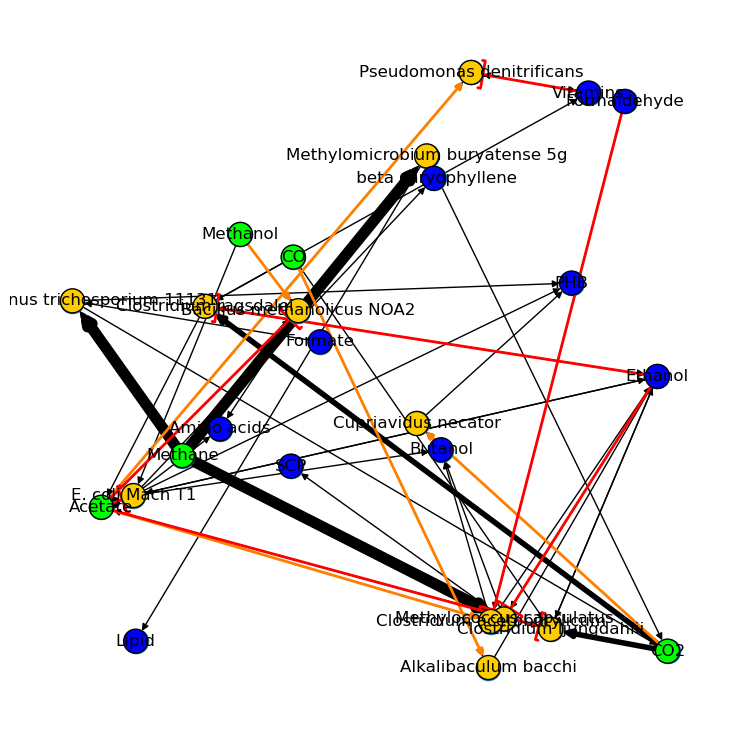

In [13]:
## Microbial assimilation of C1/C2 substrate to produce value-added products
## Date- 15.01.2025

#Import libraries from python

import pandas as pd
import numpy as np      
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network


## functions definition
def split_list(dict_b,ind,boole):
    
    list_edges=[]
    for iter1 in dict_b:
        temp_list= dict_b[iter1][ind].split(',')    # list of substrate for a micro prganism
        microbe= dict_b[iter1][0]             #microorganism name
        for iter2 in temp_list:
            if boole==True:                 # boolean function to determine source and sink node
                list_edges.append((iter2,microbe))
            elif boole==False:
                list_edges.append((microbe,iter2))
            

    return(list_edges)     # return the list of edges


def weight_list(dict_b,ind):
    
    list_edges=[]
    for iter1 in dict_b:
        temp_list= dict_b[iter1][ind]    # list of substrate for a micro prganism
        microbe= dict_b[iter1][0]             # microorganism name
        subs= dict_b[iter1][1].split(',')[0]           # list of substrate for which the weight given 
        list_edges.append([[subs,microbe],temp_list])
        
    return(list_edges)


################################# Main content file  ###################################

data_m= pd.read_csv("list_microbes_C1C2_uptake_products.csv",na_values=[""])    
# importing csv file of data containing information including substrate, microbes, products

data_m.head(5)         # cross-check the data

data_b= data_m.reindex(columns=["SN","Bacteria","C1/C2 feedstocks","ATP produced","Products","Inhibition"])
# splicing the data relevant for the network construction

data_b=data_b.set_index('SN')
# setting index as the index of microorganisms

data_b["ATP produced"]= data_b["ATP produced"].fillna(0)
# converting all NaN values to 0 for comparison

data_b=data_b.fillna("")
# converting all NaN with blank to avoid any ambiguity in network construction

dict_b= data_b.T.to_dict(orient="list")
# generate dictionary with key is the index of each microorganism
# 0 element of the list in values of dict is microbes name
# 1 element- Substrate list
# 2 element- no. of ATP produced
# 3 element- Products list
# 4 element- Inhibitors


#######################################################################################

## Generating list of edges required for network construction

list_s_m_edges=[]
# initiate list of pair of substrate microbes as edge in the form of a tuple 

list_m_c_edges=[]
# initiate list of pair of microbes and compound produced

list_i_m_edges=[]
# initiate list of pair of inhibitors and microbes 

list_weight_s_m=[]
# initiate list of pair of substrate and microbes along with weights 


list_s_m_edges= split_list(dict_b,1,True)   # edge list -- substrate- microbes 
# see split_list function for more details

list_m_c_edges= split_list(dict_b,3,False)  # edge list -- microbes - products

list_i_m_edges1= split_list(dict_b,4,True)   # edge list -- inhibitors- microbes
list_i_m_edges= [l1 for l1 in list_i_m_edges1 if len(l1[0])!=0]
# edge list after removing entries/microbes with no inhibitors

list_weights_s_m= weight_list(dict_b,2)     # weight list all data

list_weights_considered= [itr for itr in list_weights_s_m if itr[1]>0]   # weight list 

list_colors_considered= [itr[0] for itr in list_weights_s_m if itr[1]<=0]  # color list


########################################################################################

## Generating graph with the help of edge lists

G= nx.DiGraph()    # initiate directed graph

G.add_edges_from(list_s_m_edges)    # adding edges of different types as tunples
G.add_edges_from(list_m_c_edges)
G.add_edges_from(list_i_m_edges)

nodes_G= list(G.nodes)                # list of nodes to be colored 
print(nodes_G)


########################################################################################

## Drawing the network graph
plt.rcParams["figure.figsize"] = [7.5, 7.5]
plt.rcParams["figure.autolayout"] = True

pos=nx.random_layout(G, seed=5000)
color_list=[]
for node_G in nodes_G:
    if node_G in data_b['C1/C2 feedstocks'].to_list():
        color_list.append([0,1,0])
    elif node_G in data_b['Bacteria'].to_list():
        color_list.append([1,0.8,0])
    else:
        color_list.append([0,0,1])

n=nx.draw_networkx(G,pos, with_labels=True)

for iter in list_weights_considered:
    nx.draw_networkx_edges(G, pos, edgelist=[iter[0]], width=int(iter[1]*2))   
# edge width according to weights of the edge (ATP production)

for iter in list_colors_considered:
    nx.draw_networkx_edges(G, pos, edgelist=[iter], edge_color=[1,0.5,0],width=2)
# edge color according to ATP consumption 

for iter in list_i_m_edges:
    nx.draw_networkx_edges(G, pos, edgelist=[iter], edge_color=[1,0,0],width=2,arrowstyle="-[")
# edge color read with hammer tail show inhibition

nx.draw_networkx_nodes(G,pos, nodelist=G.nodes(),node_color=color_list,edgecolors='black')
# colors of nodes based on substrate and products

plt.axis('off')

########################################################################################

g= Network('900px','1150px',directed=(True),bgcolor='white',font_color='black',notebook=True)

g.from_nx(G)

g.show_buttons(filter_=["physics","nodes","edges"])
g.show("ex.html")